# POIs in Vienna

In this notebook we show the results of the data collection of:

* the location of POIs of different categories in Vienna

The notebook calls wrap functions from the script "src/data/download_pois_networks.py".

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import pickle
import matplotlib.pyplot as plt

sys.path.append('../src/data')
from download_pois_networks import download_POIs
from download_pois_networks import download_street_network, networks_to_gdf, analyze_street_network

In [6]:
# Plotting settings
#matplotlib.rcParams.update({'text.usetex': True})
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
EQUAL_AREA_PROJ = '+proj=cea'
LON_LAT_PROJ = 'EPSG:4326'
MERCATOR_PROJ = 'epsg:3395'

## Read data

In [3]:
raw_data_path = '../data/raw/'
os.listdir(raw_data_path)

['ViennaAustria_r8_nearest_loc.pkl',
 'ViennaAustria.pkl',
 'ViennaAustria_r8_hex_grid.pkl',
 'ViennaAustria_networks.pkl',
 'ViennaAustria_r8_travel_times.pkl']

In [4]:
with open(f'{raw_data_path}ViennaAustria.pkl','rb') as f:
    gdf_pois = pickle.load(f)

print(gdf_pois.shape)
display(gdf_pois.head(1))

(4015, 373)


,,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,atm,brand,brand:wikidata,brand:wikipedia,name,...,food:lokma,payment:qr_code,service:electricity,buffet,smokefree,winery,operator:wikipedia,building:part,seasonal,phone_1
node,15079903,Wien,AT,180,1140,Hütteldorfer Straße,yes,Eurospar,Q12309283,da:Eurospar,Eurospar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization

In [7]:
tags={'shop':['supermarket'],'leisure':['park'],'amenity':['school','hospital']}

boundary, pois = download_POIs(place_name="Vienna, Austria",tags=tags)

Total POIs: 4015
Found 1046 shop-supermarket
Found 1110 leisure-park
Found 616 amenity-school
Found 23 amenity-hospital


In [8]:
# Get a dictoinary of filtered dataframes indexed by tag
filtered_pois_by_tag = {}
for tag_key, tag_values in tags.items():
    for tag_value in tag_values:
        tag_name = f"{tag_key}_{tag_value}"
        # Filter POIs that match this tag
        mask = pois[tag_key] == tag_value
        if mask.any():
            filtered_pois_by_tag[tag_name] = pois[mask]

print(len(filtered_pois_by_tag))

4


In [9]:
key = 'shop_supermarket'
filtered_pois_by_tag[key].head(1)

,,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,atm,brand,brand:wikidata,brand:wikipedia,name,...,food:lokma,payment:qr_code,service:electricity,buffet,smokefree,winery,operator:wikipedia,building:part,seasonal,phone_1
node,15079903,Wien,AT,180,1140,Hütteldorfer Straße,yes,Eurospar,Q12309283,da:Eurospar,Eurospar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


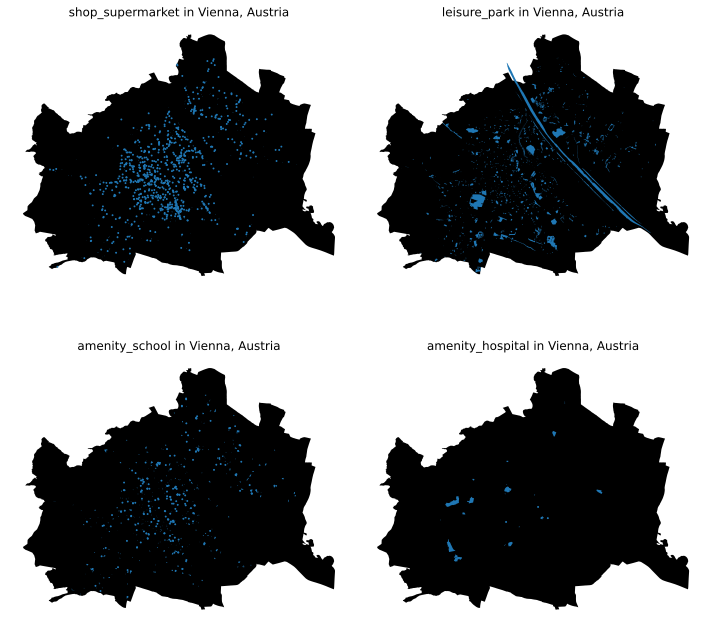

In [12]:
fig,axes = plt.subplots(2,2,figsize=(10,10))    
gdf_boundary_plot = boundary.to_crs(MERCATOR_PROJ)
for ax,key in zip(axes.flatten(),filtered_pois_by_tag.keys()):
    gdf_boundary_plot.plot(ax=ax,color='k')
    gdf_plot = filtered_pois_by_tag[key].to_crs(MERCATOR_PROJ)
    gdf_plot.plot(ax=ax,markersize=1)
    ax.set_title(f'{key} in Vienna, Austria')
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('../reports/figures/pois/pois_in_vienna.pdf')